In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fmin
#from scipy import stats
#from scipy import signal
#import detect_peaks_Duarte as dp
#import scipy.constants as constants
#import scipy.con
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 9.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 16
plt.style.use('dark_background')
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


In [17]:
def plot_2d():
    V_probe = np.zeros(100)
    x_probe = np.linspace(-4,4, 100)
    for i in range(100):
        V_probe[i] = V(x_probe[i],2,0)
        plt.plot(x,V_probe)
        plt.vlines(x_new, 0,5)
        plt.show()
        plt.scatter(x_liste[:-1,0], x_liste[:-1,1])
        plt.scatter(x_new,x_liste[-1,1])
    
def plot_3d():    
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.7)

def plot_3d_special():

    #fig = plt.figure(figsize = (10,10), dpi=50)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
#    ax.plot_surface(X, Y, Z, alpha=0.8)
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.55)
    cset = ax.contour(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='x', offset=-3.5, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='y', offset=3.5, cmap=cm.coolwarm)
    ax.set_xlabel('X')
    #ax.set_xlim(-10, 10)
    ax.set_ylabel('Y')
    #ax.set_ylim(-10, 10)
    ax.set_zlabel('Z')
    #ax.set_zlim(-10, 10)
    plt.show()

def Konturlinie():
    fig = plt.figure(figsize = (6,6))
    plt.contour(X,Y,Z, 30)
    for no in range(N):
        plt.scatter(x_liste[:,no,0], x_liste[:,no,1],marker="x")

def V_plot(position):
    V = Vp(position)
    for particle in range(N):
            V += Vpp(position, x_liste[i,particle]) 
    return V

In [33]:
#def Jacobi_Matrix(N):
N = 3
j = np.zeros([N,N])

x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4', real=True)
V = 1/2*(x1**2 + x2**2 + x3**2 + x4**2 + 1/abs(x1 - x2) + 1/abs(x1 - x3) + 1/abs(x1 - x4) + 1/abs(x2 - x3) + 1/abs(x2 - x4) + 1/abs(x3 - x4) )
print(sp.latex(sp.diff(V, x1)))

1.0 x_{1} - \frac{0.5}{\left(x_{1} - x_{4}\right)^{2}} \operatorname{sign}{\left (x_{1} - x_{4} \right )} - \frac{0.5}{\left(x_{1} - x_{3}\right)^{2}} \operatorname{sign}{\left (x_{1} - x_{3} \right )} - \frac{0.5}{\left(x_{1} - x_{2}\right)^{2}} \operatorname{sign}{\left (x_{1} - x_{2} \right )}


$1.0 x_{1} - \frac{0.5}{\left(x_{1} - x_{4}\right)^{2}} \operatorname{sign}{\left (x_{1} - x_{4} \right )} - \frac{0.5}{\left(x_{1} - x_{3}\right)^{2}} \operatorname{sign}{\left (x_{1} - x_{3} \right )} - \frac{0.5}{\left(x_{1} - x_{2}\right)^{2}} \operatorname{sign}{\left (x_{1} - x_{2} \right )}$

Die Distanz zum Mittelpunkt ist bei 3 Teilchen gemittelt: 0.9985


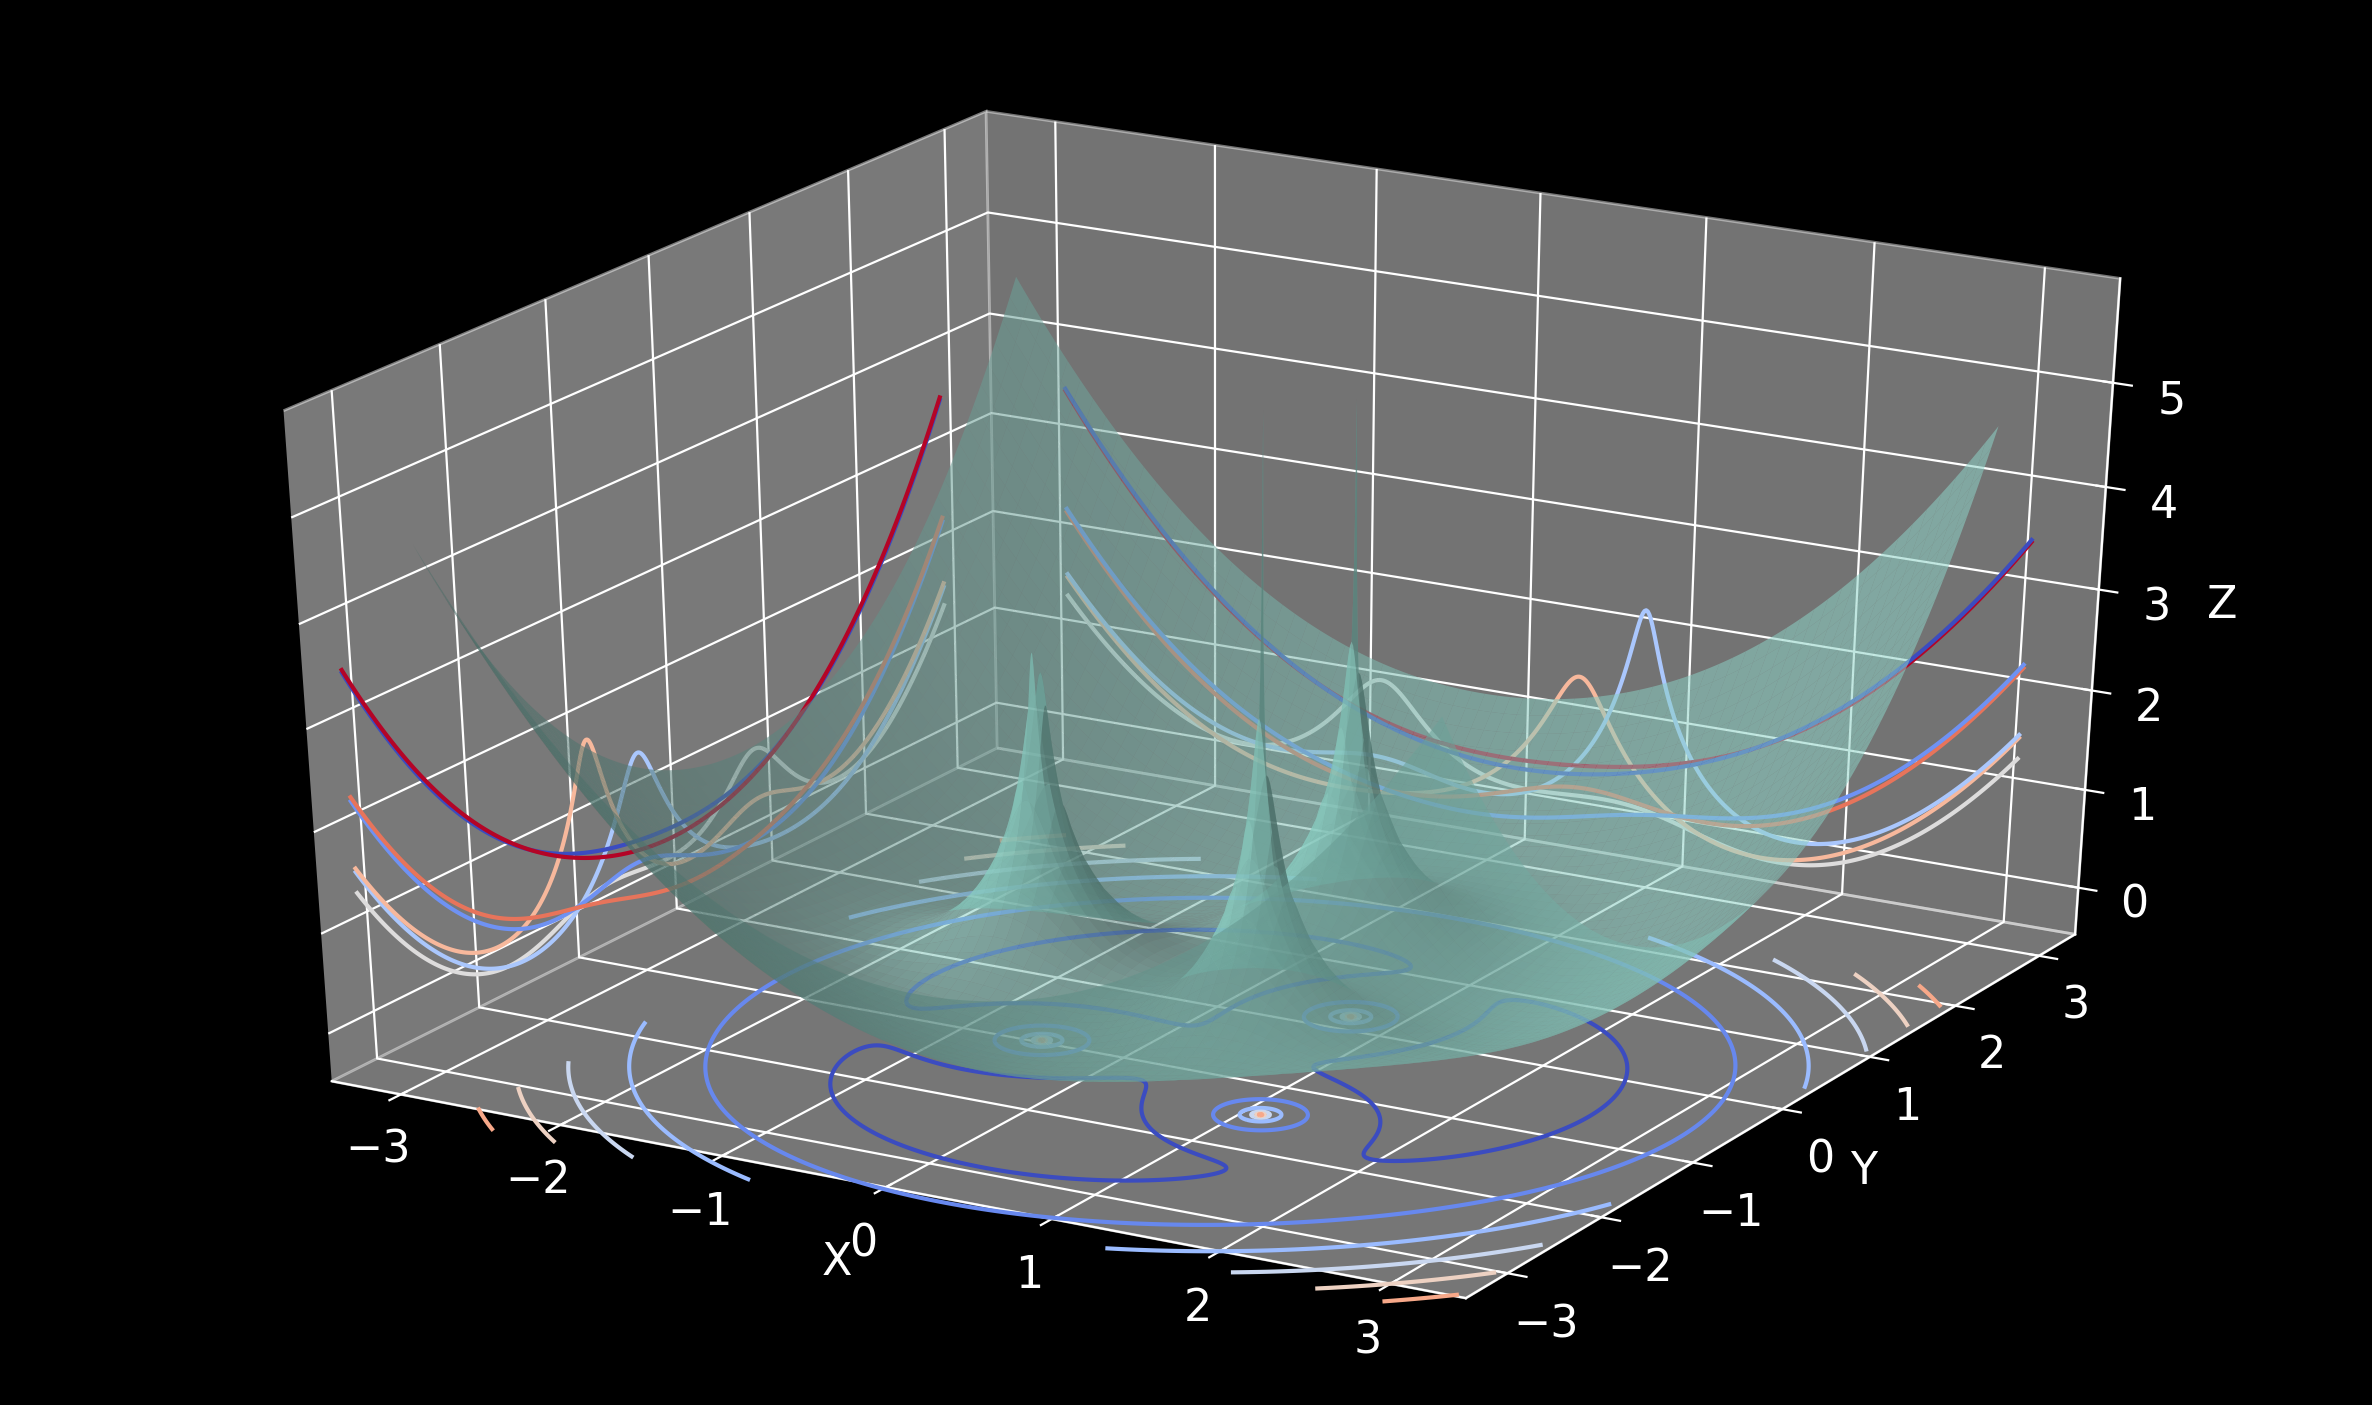

In [18]:
Vp = lambda x: np.linalg.norm(x)**2 / 2
Vpp = lambda x1, x2: -np.log(np.linalg.norm(x1-x2))  

def V(neue_position, particle_nr, dim):
    position = x_liste[i,particle_nr]
    position[dim] = neue_position
    V = Vp(position)
    for particle in range(N):
        if particle != particle_nr:
            V += Vpp(position, x_liste[i, particle]) 
    return V

gridpoints = 600
x_grid,y_grid = np.linspace(-3,3,gridpoints), np.linspace(-3,3,gridpoints)
X,Y = np.meshgrid(x_grid, y_grid)#, sparse=True)
Z = np.zeros([600,600])

#for N in [2,3,4]:

N = 3
if 1:
    x_start = np.random.rand(N,2)*2 -1
    iterations = int(N * N /2) 
    x_liste = np.zeros([iterations + 1,N, 2])
    x_liste[0] = x_start
    for i in range(iterations):
        for part in range(N):
            x_liste[i+1,part,0] = fmin(V,x_liste[i,part,0],args=(part,0,),disp=0)
            x_liste[i+1,part,1] = fmin(V,x_liste[i,part,1],args=(part,1,),disp=0)

    for k in range(Z.shape[0]):
        for l in range(Z.shape[1]):
            Z[k,l] = V_plot(np.array([X[k,l],Y[k,l]]))

    print("Die Distanz zum Mittelpunkt ist bei %i Teilchen gemittelt: %.4f"%(N,np.mean([np.linalg.norm(x_liste[-1,o]) for o in range(N)])))            
    plot_3d_special()